<a href="https://colab.research.google.com/github/akshaya-nagarajan/DeepLearningProjects/blob/master/homework_1/BasicTensorKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

#### Handwritten dataset mnist

In [0]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


#### Training data with pixels of digit images

In [0]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

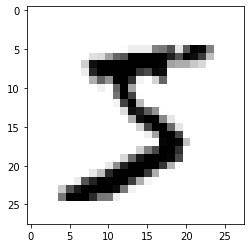

In [0]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [0]:
print(y_train[0])

5


#### Normalize the data

In [0]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

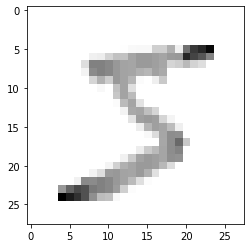

In [0]:
print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

#### Building the model

Sequential - feed forward layer

In [0]:
model = tf.keras.models.Sequential()

Flatten - input layer - flattens the images

In [0]:
model.add(tf.keras.layers.Flatten())

Relu - hidden layer - Having 128 Units


In [0]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

Adding another hidden layer

In [0]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

Output layer - with 10 nodes

In [0]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

Compile and Fit the model

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.fit(x_train, y_train, epochs=3)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 81us/sample - loss: 0.2598 - acc: 0.9253
Epoch 2/3
60000/60000 [==============================] - 5s 78us/sample - loss: 0.1084 - acc: 0.9665
Epoch 3/3
60000/60000 [==============================] - 4s 74us/sample - loss: 0.0729 - acc: 0.9773


In [0]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 0s 35us/sample - loss: 0.1059 - acc: 0.9658
0.1059405960678123
0.9658


In [0]:
model.save('epic_num_reader.model')

In [0]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
predictions = new_model.predict(x_test)

In [0]:
print(predictions)

[[2.0268720e-07 9.4240505e-08 1.4274658e-04 ... 9.9981505e-01
  1.9610200e-06 6.8842927e-09]
 [1.1935689e-09 2.1689573e-05 9.9995041e-01 ... 2.0224076e-11
  2.6010688e-05 1.2830831e-11]
 [1.5837921e-06 9.9971157e-01 8.2050510e-06 ... 7.6333868e-05
  1.8635365e-04 6.3224360e-07]
 ...
 [4.3308578e-08 1.4822427e-06 1.4062961e-06 ... 4.2998054e-05
  1.4266319e-05 4.3445816e-05]
 [1.6052596e-05 2.1204862e-06 2.8041060e-07 ... 1.6077270e-06
  3.7514754e-03 1.1983929e-07]
 [7.1218471e-07 1.7832996e-09 1.3905455e-08 ... 2.7078232e-11
  1.8534056e-08 2.4061094e-08]]


In [0]:
import numpy as np

print(np.argmax(predictions[1]))

2


Prediction of the model

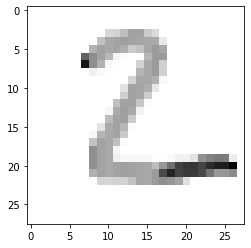

In [0]:
plt.imshow(x_test[1],cmap=plt.cm.binary)
plt.show()